In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
! ls ../input

Data_Dictionary.xlsx		   sample_submission.csv.zip
historical_transactions.csv.zip    test.csv.zip
merchants.csv.zip		   train.csv.zip
new_merchant_transactions.csv.zip


In [3]:
def read_df(name):
    df = pd.read_csv(name)
    print(df.head())
    def tokenize(x):
        if type(x) != str: return [np.nan]*2
        return [ int(y) for y in x.split("-") ] 
    year_month = df.first_active_month.apply(tokenize)

    year = year_month.apply(lambda x: x[0])
    month = year_month.apply(lambda x: x[1])
    df["first_active_date"] = pd.to_datetime(pd.DataFrame(dict(year=year,month=month, day=1)))
    
    return df

In [58]:
train = read_df("../input/train.csv.zip")

  first_active_month          card_id  feature_1  feature_2  feature_3  \
0            2017-06  C_ID_92a2005557          5          2          1   
1            2017-01  C_ID_3d0044924f          4          1          0   
2            2016-08  C_ID_d639edf6cd          2          2          0   
3            2017-09  C_ID_186d6a6901          4          3          0   
4            2017-11  C_ID_cdbd2c0db2          1          3          0   

     target  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749  


In [15]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,first_active_date
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,2017-06-01
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,2017-01-01
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,2016-08-01
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,2017-09-01
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,2017-11-01


In [16]:
train.card_id.describe()

count              201917
unique             201917
top       C_ID_17bf048083
freq                    1
Name: card_id, dtype: object

In [17]:
train.first_active_date.describe()

count                  201917
unique                     75
top       2017-09-01 00:00:00
freq                    13878
first     2011-11-01 00:00:00
last      2018-02-01 00:00:00
Name: first_active_date, dtype: object

In [18]:
train.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


In [19]:
test = read_df("../input/test.csv.zip")

  first_active_month          card_id  feature_1  feature_2  feature_3
0            2017-04  C_ID_0ab67a22ab          3          3          1
1            2017-01  C_ID_130fd0cbdd          2          3          0
2            2017-08  C_ID_b709037bc5          5          1          1
3            2017-12  C_ID_d27d835a9f          2          1          0
4            2015-12  C_ID_2b5e3df5c2          5          1          1


In [20]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,first_active_date
0,2017-04,C_ID_0ab67a22ab,3,3,1,2017-04-01
1,2017-01,C_ID_130fd0cbdd,2,3,0,2017-01-01
2,2017-08,C_ID_b709037bc5,5,1,1,2017-08-01
3,2017-12,C_ID_d27d835a9f,2,1,0,2017-12-01
4,2015-12,C_ID_2b5e3df5c2,5,1,1,2015-12-01


In [21]:
test.card_id.describe()

count              123623
unique             123623
top       C_ID_941a959e5f
freq                    1
Name: card_id, dtype: object

In [22]:
test.first_active_date.describe()

count                  123622
unique                     75
top       2017-09-01 00:00:00
freq                     8805
first     2011-11-01 00:00:00
last      2018-01-01 00:00:00
Name: first_active_date, dtype: object

In [23]:
test.describe()

,feature_1,feature_2,feature_3
count,123623.00000,123623.000000,123623.000000
mean,3.10926,1.741796,0.564377
std,1.18911,0.749195,0.495840
min,1.00000,1.000000,0.000000
25%,2.00000,1.000000,0.000000
50%,3.00000,2.000000,1.000000
75%,4.00000,2.000000,1.000000
max,5.00000,3.000000,1.000000


In [24]:
historical_transactions = pd.read_csv("../input/historical_transactions.csv.zip")

In [25]:
historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [26]:
historical_transactions.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.645950e+07,2.911236e+07,2.911236e+07
mean,1.293256e+02,6.484954e-01,4.810130e+02,-4.487294e+00,3.640090e-02,2.194578e+00,1.056679e+01,2.684839e+01
std,1.042563e+02,2.795577e+00,2.493757e+02,3.588800e+00,1.123522e+03,1.531896e+00,6.366927e+00,9.692793e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,9.000000e+01,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.000000e+00,1.600000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,0.000000e+00,6.010604e+06,5.000000e+00,2.400000e+01,4.100000e+01


In [27]:
historical_transactions.card_id.describe()

count            29112361
unique             325540
top       C_ID_3d3dfdc692
freq                 5582
Name: card_id, dtype: object

In [28]:
transaction_by_card = historical_transactions.groupby("card_id")

In [29]:
card_info = transaction_by_card["purchase_amount"].aggregate(["mean","count","std"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e389f8860>]],
      dtype=object)

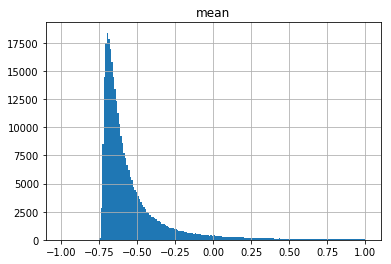

In [30]:
card_info.hist("mean",bins=200,range=[-1,1])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d8cb95be0>]],
      dtype=object)

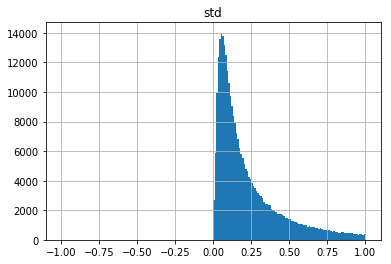

In [31]:
card_info.hist("std",bins=200,range=[-1,1])


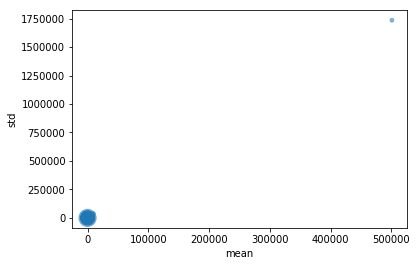

In [54]:
plot_info = card_info#[card_info["mean"]<10]

plot_info.plot.scatter("mean","std",s=4.*np.sqrt(plot_info["count"]),alpha=0.5)


In [38]:
transaction_by_shop = historical_transactions.groupby("merchant_id")

In [44]:
shop_info = transaction_by_shop["purchase_amount"].aggregate(["mean","count","std"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d82affef0>]],
      dtype=object)

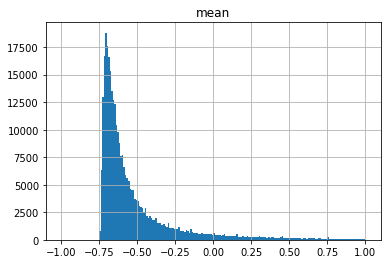

In [45]:
shop_info.hist("mean",bins=200,range=[-1,1])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d828cb978>]],
      dtype=object)

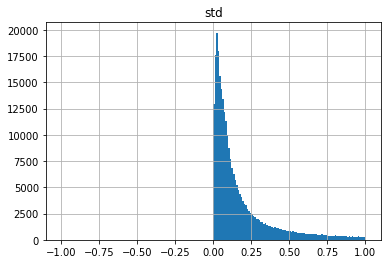

In [46]:
shop_info.hist("std",bins=200,range=[-1,1])


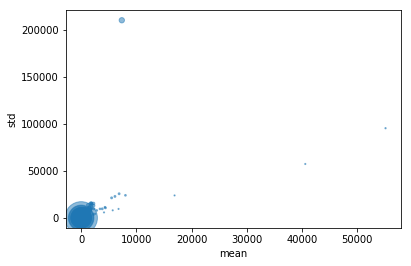

In [52]:
plot_info = shop_info#[shop_info["mean"]<10]

plot_info.plot.scatter("mean","std",s=np.sqrt(plot_info["count"]),alpha=0.5)


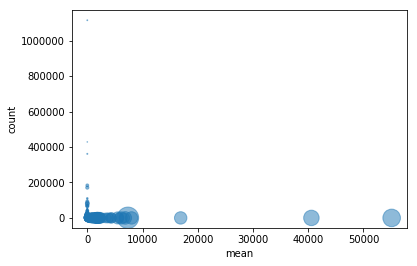

In [53]:
plot_info = shop_info#[shop_info["count"]<1000]

plot_info.plot.scatter("mean","count",s=np.sqrt(plot_info["std"]),alpha=0.5)

In [59]:
train["card_index"] = train["card_id"]
train.set_index("card_index",inplace=True)

In [64]:
train_joined = train.join(card_info)

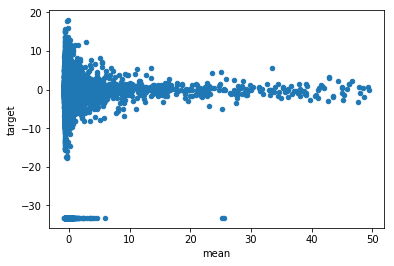

In [69]:
train_joined[train_joined["mean"]<50].plot.scatter("mean","target")

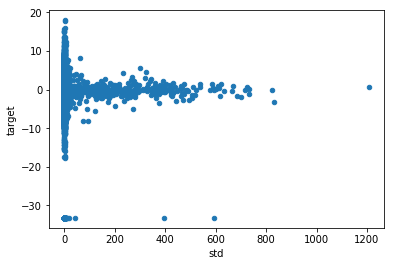

In [70]:
train_joined[train_joined["mean"]<50].plot.scatter("std","target")

In [71]:
merchants = pd.read_csv("../input/merchants.csv.zip")

In [72]:
merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [73]:
merchants.describe()

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,334696.000000,334696.000000,322809.000000
mean,31028.736143,423.131663,25.116404,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335,102.917926,11.860942,2.380002
std,31623.043426,252.898046,9.807371,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138,107.090673,6.176889,1.562661
min,1.000000,-1.000000,-1.000000,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000,-1.000000,-1.000000,1.000000
25%,3612.000000,222.000000,19.000000,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000,-1.000000,9.000000,1.000000
50%,19900.000000,373.000000,27.000000,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000,69.000000,9.000000,2.000000
75%,51707.250000,683.000000,33.000000,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000,182.000000,16.000000,4.000000
max,112586.000000,891.000000,41.000000,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000,347.000000,24.000000,5.000000


In [74]:
dictionary = pd.read_excel("../input/Data_Dictionary.xlsx")

In [75]:
dictionary

,train.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Unique card identifier
3,first_active_month,"'YYYY-MM', month of first purchase"
4,feature_1,Anonymized card categorical feature
5,feature_2,Anonymized card categorical feature
6,feature_3,Anonymized card categorical feature
7,target,Loyalty numerical score calculated 2 months af...
